# F06 G05 2D project 2021

In this project, we are tasked with supporting WHO in developing a model to predict the number of deaths in each country. There are several factors that contribute to the deaths caused by COVID-19, but not all data can be accurately transcribed into values that can be used to predict deaths in a nation or region. However, information such as the number of infected patients, a country's wealth, facilities, the number of vaccinated, the number of completely vaccinated, and the human development index can easily acquire and be incorporated in our model. Considering data from the actual world is not perfectly linear, we will look for data that are strongly correlated. We will be able to predict the number of deaths in a specific nation with assumptions made in any given day using this model.

In this project, we will be using 5 external libraries to aid us in building our model. The libraries are mainly pandas, numpy, seaborn, matplotlib and math. This project is tested and working on python v3.8.3. The cell below will install the requirements for this models.

In [ ]:
pip install -r requirements.txt

In [3]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

This model will make use of modified functions from the homework. Instead of using the mean and standard deviation in normalization, we will use the its maximum and minimum. The data are normalized to avoid variables from overflowing. Normalizing using standard deviation performs for normally distributed data, but because the data in this circumstance is not normally distributed and tends to follow a trend, min-max scaling will be adopted. The feasibility of the model will be determined using functions such as mean squared error, r2 score, adjusted r2 and correlation. While the rest will be employed to predict the model's coefficient.

In [58]:
def normalize_z(df):
    return (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))

def correlation(x, y):
    return x.corr(y)

def prepare_x(df_x):
    xAxis = df_x.to_numpy()
    array1 = np.ones((df_x.shape[0], 1))
    return np.concatenate((array1, xAxis), axis=1)

def prepare_y(df_y):
    return df_y.to_numpy()

def predict(df_x, beta):
    x = prepare_x(normalize_z(df_x))
    return np.matmul(x, beta)

def r2_score(y, ypred):
    ybar = np.mean(y)
    SStot = np.sum((y - ybar) ** 2)
    SSres = np.sum((y - ypred) ** 2)
    return 1 - SSres / SStot

def mean_squared_error(target, pred):
    n = target.shape[0]
    s = np.sum((target - pred) ** 2)
    return (1 / n) * s

def gradient_descent(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros((num_iters, 1))
    for n in range(num_iters):
        yp = np.matmul(X, beta)
        error = yp - y
        delta = np.matmul(X.T, error)
        beta = beta - (alpha/m)*delta
        J_storage[n] = compute_cost(X,y,beta)
    return beta, J_storage

def compute_cost(X, y, beta):
    size = X.shape[0]
    yp = np.matmul(X, beta)
    error = yp - y
    J = (1/(2*size))*np.matmul(error.T, error)
    return J

Since WHO is interested in the prediction of COVID-19 death rate, we will create a statistical representation of the death rate at the global level. Deaths, populations, and policies of individual nations varies by thousands, making it difficult to develop a prediction model. To compensate for the variance, we will normalize all data sets, such as death in thousands, percentage of vaccination in the country, and infected per million. While working on modeling uncertainty in an excel sheet, data is cleaned up. To avoid future indications of unknown null data, we will set the value of all null cells to 0.

In [51]:
# Read csv file
dataFrame = pd.read_csv("2Ddata8.csv")
# Y axis Data
yVal = pd.DataFrame(dataFrame.loc[:, "total_deaths_per_million"].fillna(0))
# X axis Data
xVal = pd.DataFrame(columns=[])
xVal["Days"] = pd.DataFrame(dataFrame["days"].fillna(0))
xVal["Fully_Vaccinated"] = pd.DataFrame(dataFrame["fully_vaccination_percentage"].fillna(0))
xVal["Vaccinated"] = pd.DataFrame(dataFrame["vaccination_percentage"].fillna(0))
xVal["GDP"] = pd.DataFrame(dataFrame["gdp_per_capita"].fillna(0))
xVal["Population"] = pd.DataFrame(dataFrame["population_density"].fillna(0))
xVal["HDI"] = pd.DataFrame(dataFrame["human_development_index"].fillna(0))
xVal["Facilities"] = pd.DataFrame(dataFrame["hospital_beds_per_thousand"].fillna(0))
# Normalise all x-axis columns
xMVal = normalize_z(xVal)
# convert x-axis and y-axis into arrays, and add offsets 1 in x-axis
xAxis = prepare_x(xMVal)
yAxis = prepare_y(yVal)

iterations = 10500
alpha = 0.05
beta = np.zeros((xAxis.shape[1], 1))

beta, dummy = gradient_descent(xAxis, yAxis, beta, alpha, iterations)

We will compare our prediction to the actual data to determine the global trend in deaths where green represents the actual data and blue to represent the predicted.

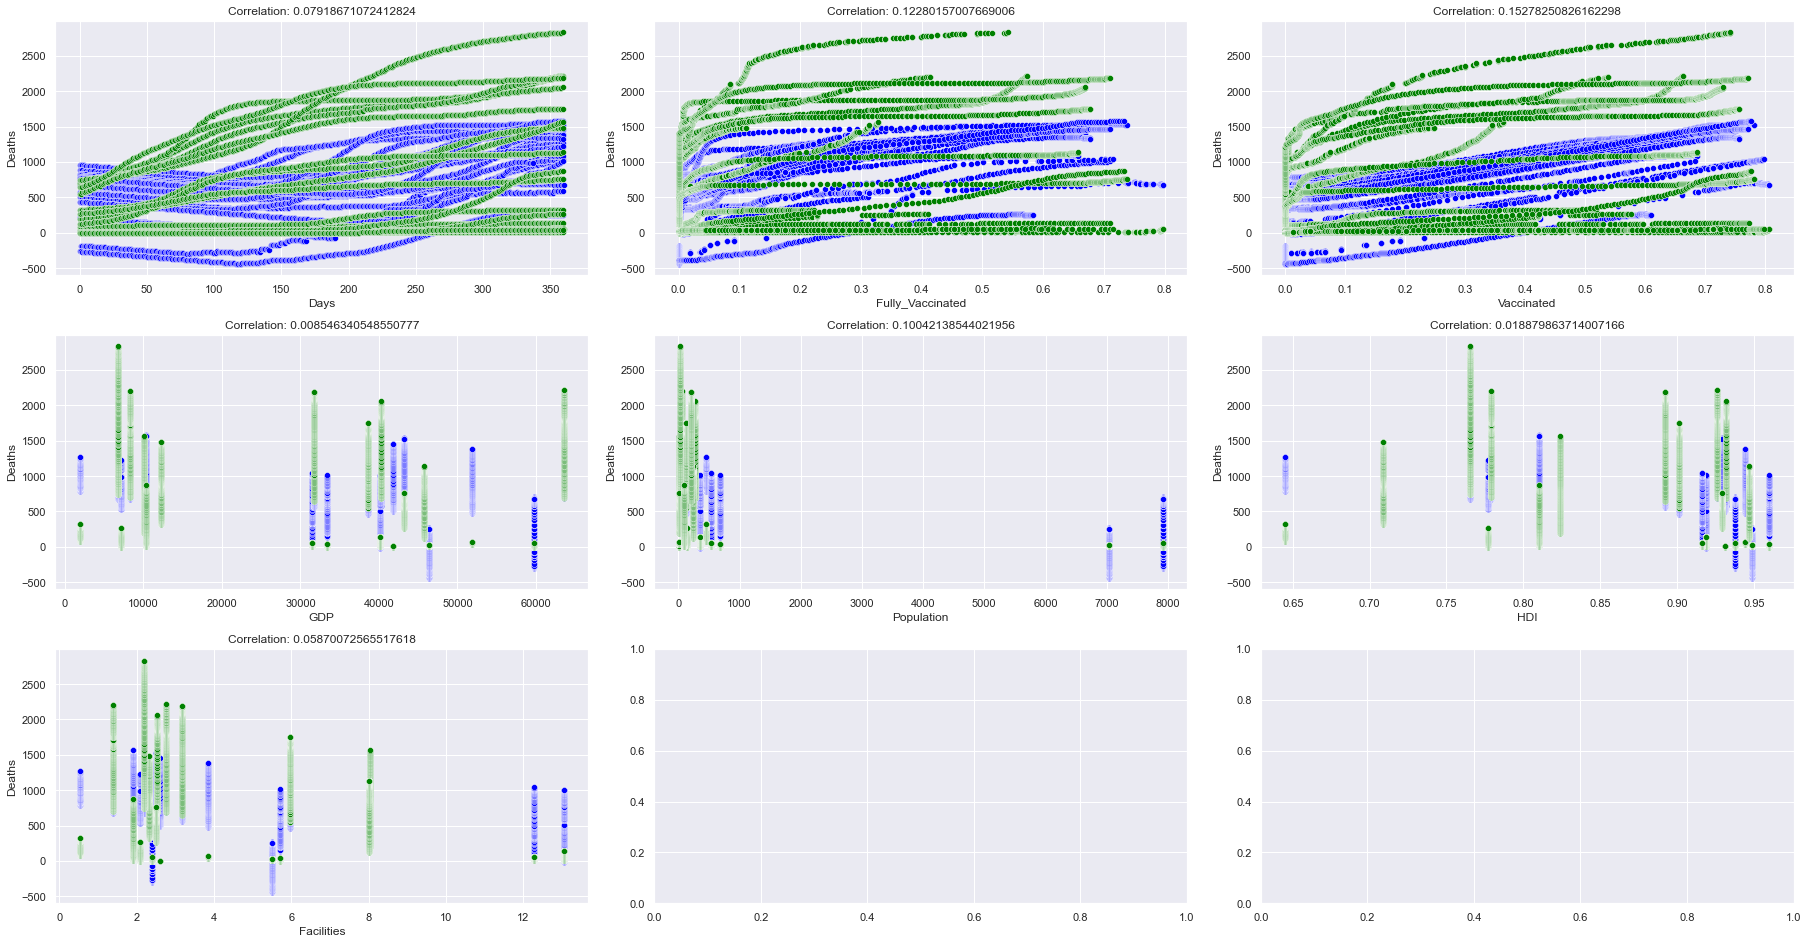

Beta Coefficient:  ['1009.4059388459681', '-533.8587613004631', '131.11760916074624', '1257.598592433108', '178.17699339312492', '-943.5151755058973', '-355.3110526244941', '-550.6747362802264']
r^2 Value: [0.34298884]
Adjusted r^2 Value: [0.34234937]


In [68]:
prediction = pd.DataFrame(predict(xVal, beta))
fig, axs = plt.subplots(math.ceil(len(xVal.columns)/3), 3, figsize=(25, 13), constrained_layout=True)
for index, x in enumerate(xVal.columns):
    sns.set()
    corr = correlation(xVal[x], yVal["total_deaths_per_million"])
    scat0 = sns.scatterplot(x=xVal[x], y=prediction[0], ax=axs[int(index/3), index%3,], color="blue")
    scat1 = sns.scatterplot(x=xVal[x], y=yVal["total_deaths_per_million"], ax=axs[int(index/3), index%3,], color="green")
    scat0.set_title("Correlation: " + str(corr**2))
    scat0.set_ylabel("Deaths")
    scat0.set_xlabel(x)
plt.show()
print("Beta Coefficient: ", [", ".join(x) for x in beta.astype(str)])
val = r2_score(prepare_y(yVal), prediction).values
print("r^2 Value:", val)
# print(xVal.shape)
print("Adjusted r^2 Value:", 1-((1-val)*(xVal.shape[0]-1)/(xVal.shape[0]-1-xVal.shape[1])))
# display(xVal.columns)   

Singapore
United States
United Kingdom
Japan
Hong Kong
New Zealand
Australia
India
South Africa
Mexico
Russia
Brazil
South Korea
Germany
Thailand
France
Canada
Italy
Malaysia
Taiwan


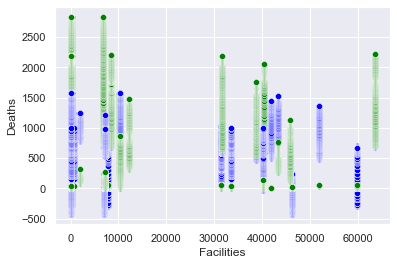

In [64]:
for i in countryData:
    prediction = pd.DataFrame(predict(xVal_train, countryData[i], beta))
    print(i)
    for x in xVal.columns:
        sns.set()

        scat0 = sns.scatterplot(x=countryData[i][x], y=prediction[0], color="blue")
        scat1 = sns.scatterplot(x=countryData[i][x], y=countryYData[i]["total_deaths_per_million"], color="green")

        scat0.set_ylabel("Deaths")
        scat0.set_xlabel(x)
        # plt.show()

Singapore


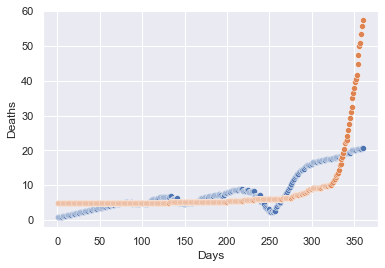

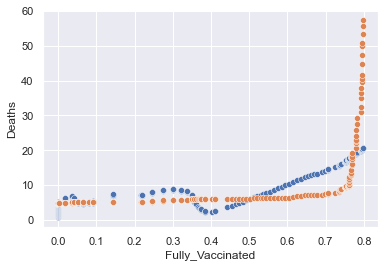

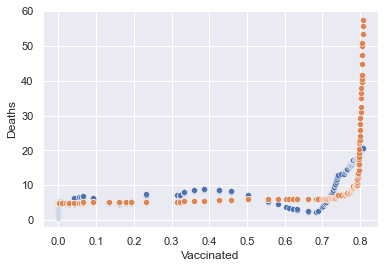

(108, 1) (360, 1)
r^2 Value: 0    0.478229
dtype: float64


array([[  0.74429546],
       [ 19.90024457],
       [ 36.3423769 ],
       [-36.3534448 ]])

United States


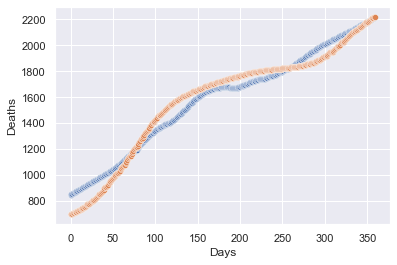

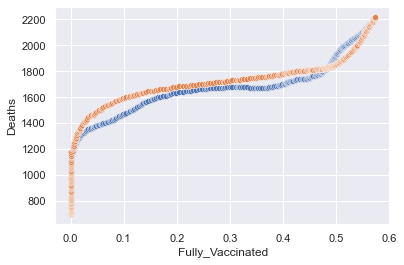

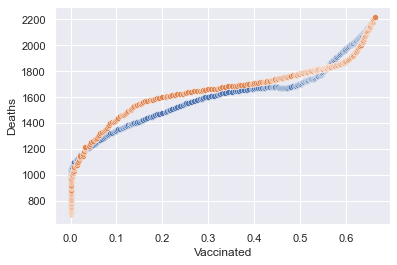

(108, 1) (360, 1)
r^2 Value: 0    0.960859
dtype: float64


array([[  850.26206404],
       [ 1372.38940904],
       [-1140.43154586],
       [ 1132.72331498]])

United Kingdom


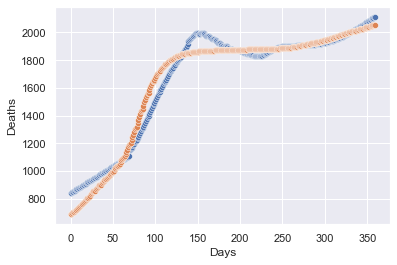

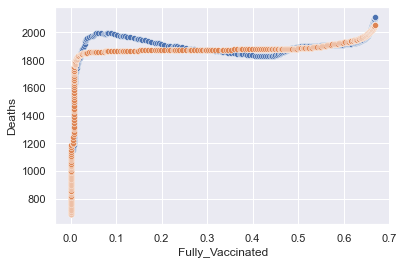

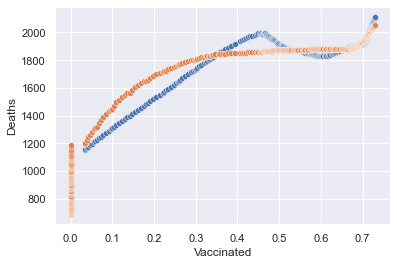

(108, 1) (360, 1)
r^2 Value: 0    0.964757
dtype: float64


array([[  839.34361714],
       [ 1394.53497998],
       [-1229.37388997],
       [ 1109.17159933]])

Japan


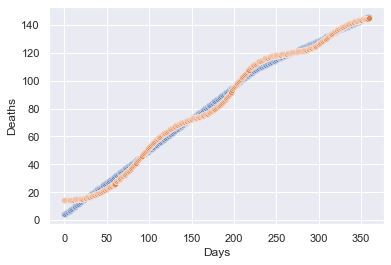

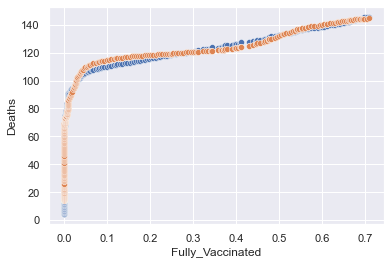

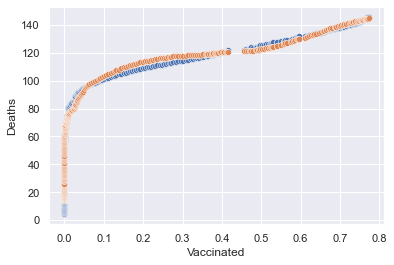

(108, 1) (360, 1)
r^2 Value: 0    0.993744
dtype: float64


array([[  4.06091656],
       [164.59206929],
       [-39.05668677],
       [ 16.22104757]])

Hong Kong


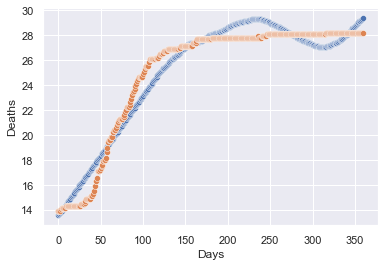

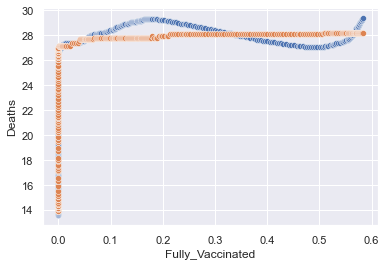

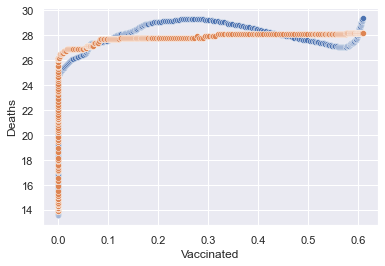

(108, 1) (360, 1)
r^2 Value: 0    0.953136
dtype: float64


array([[ 13.53748939],
       [ 34.51241214],
       [-10.80406392],
       [ -7.83545376]])

New Zealand


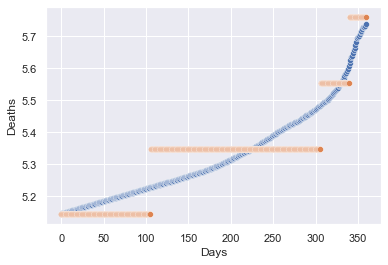

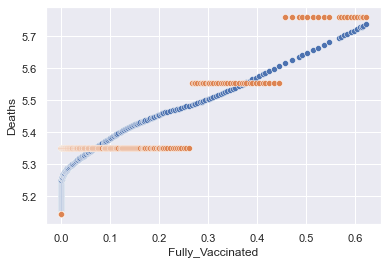

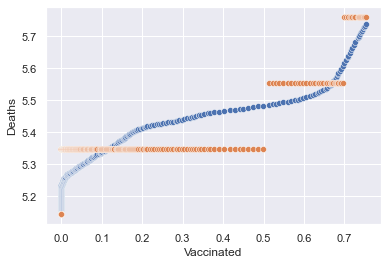

(108, 1) (360, 1)
r^2 Value: 0    0.823801
dtype: float64


array([[ 5.1453454 ],
       [ 0.28149822],
       [ 0.43939731],
       [-0.12924485]])

Australia


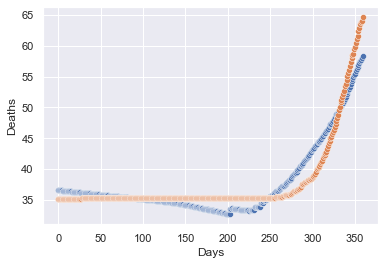

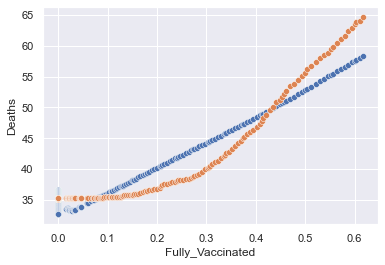

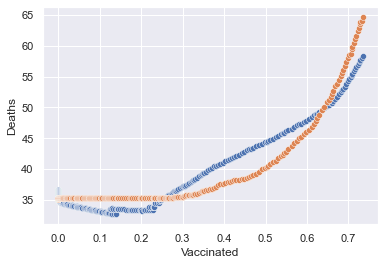

(108, 1) (360, 1)
r^2 Value: 0    0.895399
dtype: float64


array([[36.56268499],
       [-5.27877661],
       [32.16687798],
       [-5.17266243]])

India


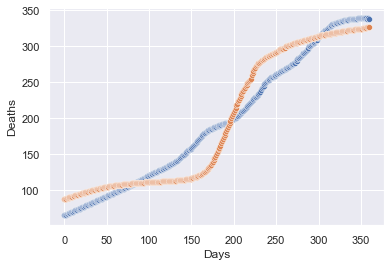

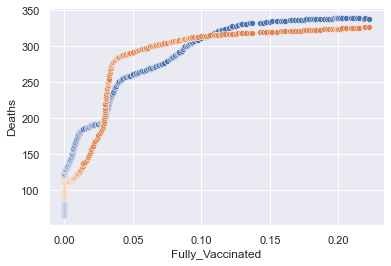

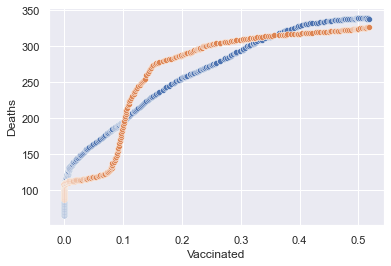

(108, 1) (360, 1)
r^2 Value: 0    0.929062
dtype: float64


array([[  65.38192614],
       [ 191.33290714],
       [-154.59932965],
       [ 236.02880154]])

South Africa


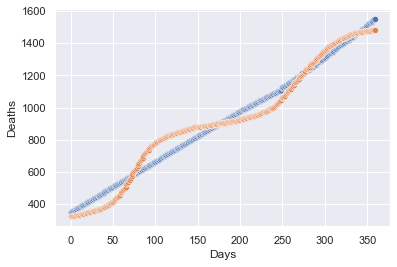

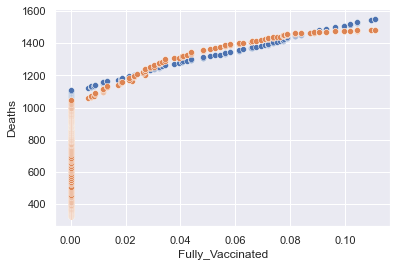

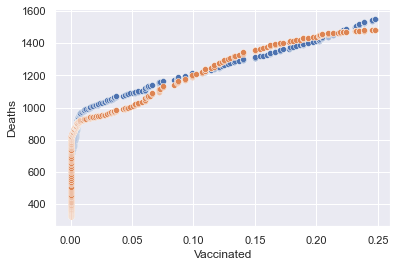

(108, 1) (360, 1)
r^2 Value: 0    0.965459
dtype: float64


array([[ 348.94859458],
       [1132.79149475],
       [ 162.39180287],
       [ -91.4141548 ]])

Mexico


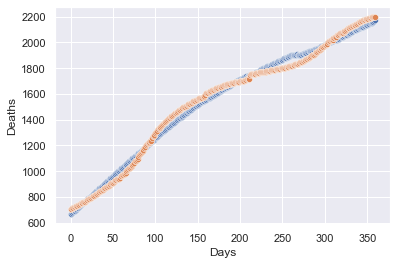

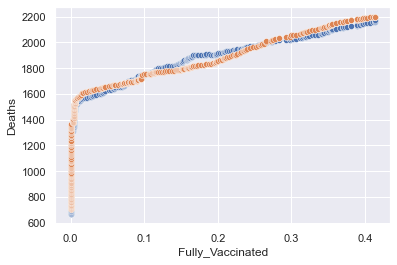

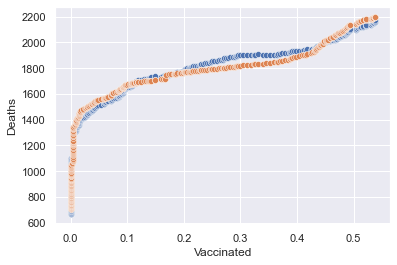

(108, 1) (360, 1)
r^2 Value: 0    0.990335
dtype: float64


array([[ 664.2802851 ],
       [2141.89364098],
       [-239.64939638],
       [-393.67718984]])

Russia


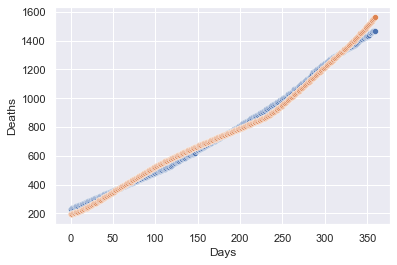

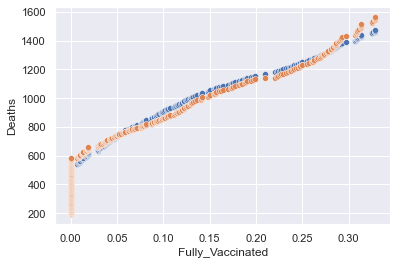

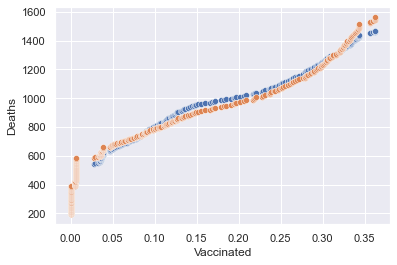

(108, 1) (360, 1)
r^2 Value: 0    0.991484
dtype: float64


array([[229.94177418],
       [907.76989598],
       [299.3575507 ],
       [ 33.63179726]])

Brazil


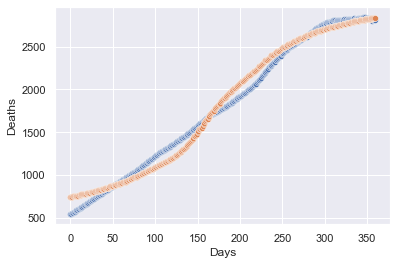

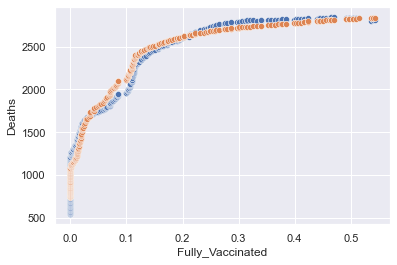

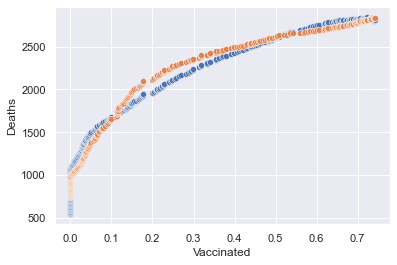

(108, 1) (360, 1)
r^2 Value: 0    0.982859
dtype: float64


array([[  541.35331108],
       [ 2364.52429407],
       [-1018.11193802],
       [  925.33235854]])

South Korea


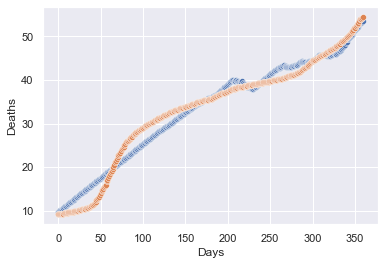

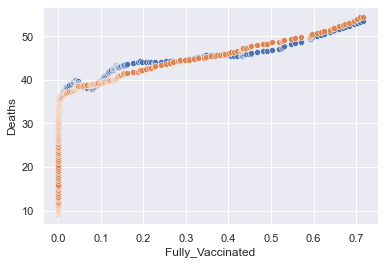

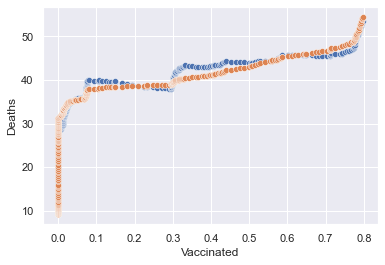

(108, 1) (360, 1)
r^2 Value: 0    0.965947
dtype: float64


array([[  9.75001635],
       [ 55.75971562],
       [ 12.12702956],
       [-24.00065835]])

Germany


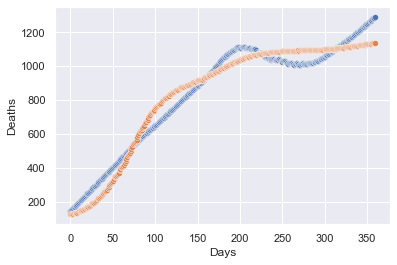

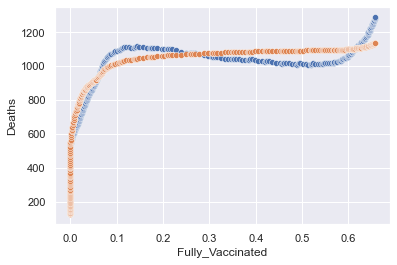

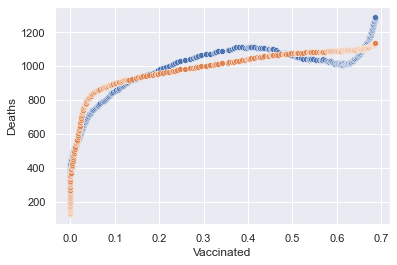

(108, 1) (360, 1)
r^2 Value: 0    0.955067
dtype: float64


array([[ 146.097636  ],
       [1852.3769054 ],
       [-901.86956007],
       [ 194.5415857 ]])

Thailand


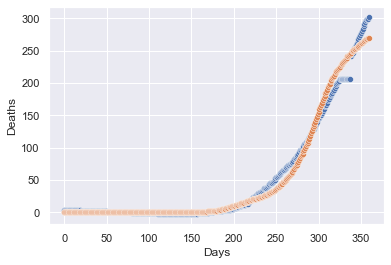

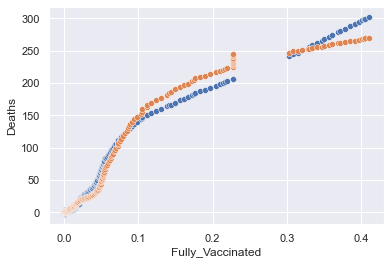

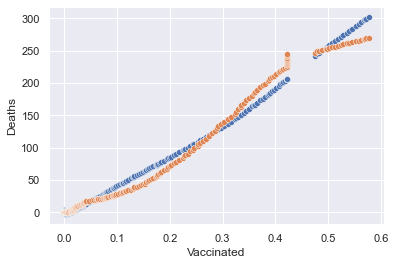

(108, 1) (360, 1)
r^2 Value: 0    0.983619
dtype: float64


array([[  4.04096889],
       [-18.62628353],
       [ 71.26654547],
       [245.5803619 ]])

France


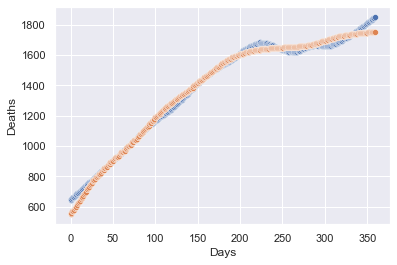

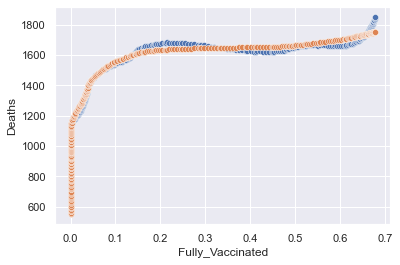

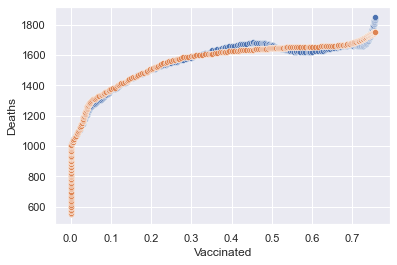

(108, 1) (360, 1)
r^2 Value: 0    0.992108
dtype: float64


array([[ 645.95430131],
       [1853.43645929],
       [-947.56145957],
       [ 301.57588547]])

Canada


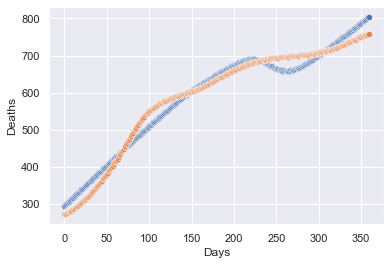

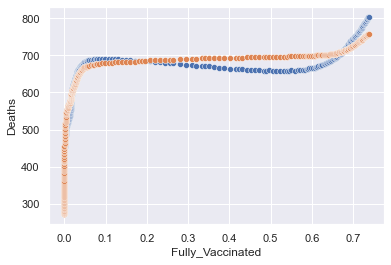

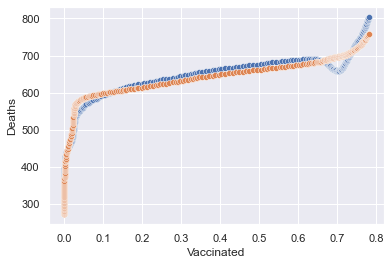

(108, 1) (360, 1)
r^2 Value: 0    0.968834
dtype: float64


array([[ 294.65756354],
       [ 784.62745595],
       [-200.18050882],
       [ -74.41498397]])

Italy


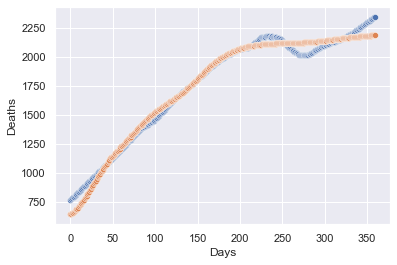

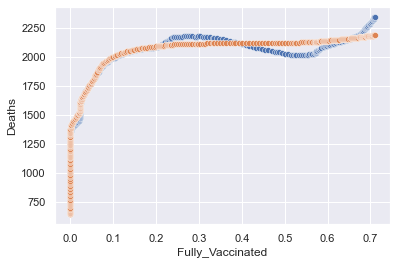

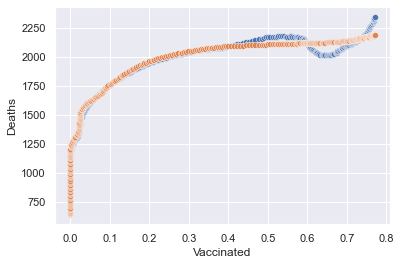

(108, 1) (360, 1)
r^2 Value: 0    0.984114
dtype: float64


array([[  767.62479312],
       [ 2597.27764257],
       [-1393.21312491],
       [  372.31483945]])

Malaysia


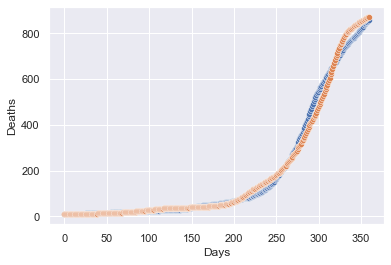

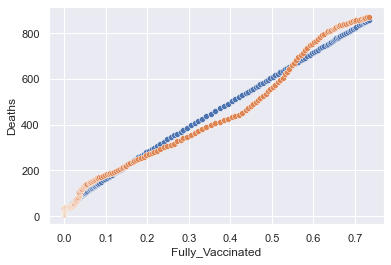

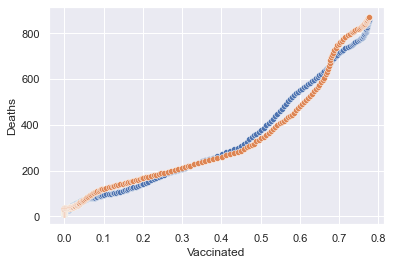

(108, 1) (360, 1)
r^2 Value: 0    0.991781
dtype: float64


array([[  8.39970793],
       [ 53.60552329],
       [737.15737086],
       [ 60.31247107]])

Taiwan


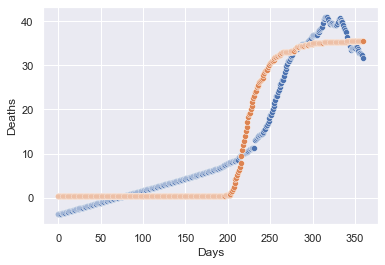

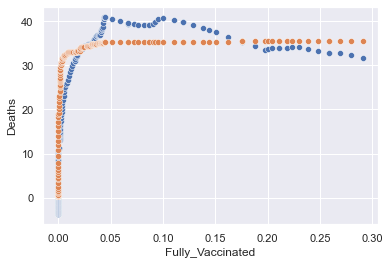

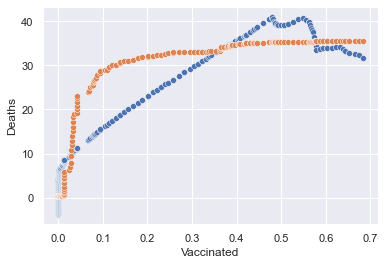

(108, 1) (360, 1)
r^2 Value: 0    0.904165
dtype: float64


array([[ -3.77034914],
       [ 19.3596279 ],
       [-29.71951667],
       [ 45.86047053]])

In [84]:
for i in countryData:
    xVal_train, xVal_test, yVal_train, yVal_test = split_data(countryData[i], countryYData[i], 100, 0.3)
    xMVal = normalize_z(xVal_train)

    xAxis = prepare_x(xMVal)
    yAxis = prepare_y(yVal_train)

    iterations = 10500
    alpha = 0.05
    beta = np.zeros((xAxis.shape[1], 1))

    beta, dummy = gradient_descent(xAxis, yAxis, beta, alpha, iterations)
    # prediction = pd.DataFrame(predict(xVal_train, xVal_test, beta))
    prediction = pd.DataFrame(predict(xVal_train, countryData[i], beta))
    print(i)
    for x in xVal_train.columns:
        sns.set()

        scat0 = sns.scatterplot(x=countryData[i][x], y=prediction[0])
        scat1 = sns.scatterplot(x=countryData[i][x], y=countryYData[i]["total_deaths_per_million"])
        # scat0 = sns.scatterplot(x=xVal_test[x], y=prediction[0])
        # scat1 = sns.scatterplot(x=xVal_test[x], y=yVal_test["total_deaths_per_million"])

        scat0.set_ylabel("Deaths")
        scat0.set_xlabel(x)
        plt.show()

    print(yVal_test.shape, prediction.shape)
    print("r^2 Value:", r2_score(prepare_y(countryYData[i]), prediction))
    display(beta)